                                        Irène Marchand     projet personnel

# CNN: Image Classifier

In this project, we will write an algorithm to classify whether images contain either a dog or a cat. We will use the following Kaggle dataset, https://www.kaggle.com/c/dogs-vs-cats/data, the training archive contains 25,000 images of dogs and cats.

## Let’s import all the necessary libraries first:

In [80]:
import cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

import os
import random
import gc   #Gabage collector for cleaning deleted data from memory

-**cv2**: OpenCV (Open Source Computer Vision) is a library of programming functions mainly aimed at real-time computer vision. In simple language it is library used for Image Processing. It is mainly used to do all the operation related to Images.

-**numpy**: Numpy is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays.

-**pandas**:Similar to NumPy, Pandas is one of the most widely used python libraries in data science. It provides high-performance, easy to use structures and data analysis tools. Unlike NumPy library which provides objects for multi-dimensional arrays, Pandas provides in-memory 2d table object called Dataframe.

-**matplot**:Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.

-**%matplotlib inline**:Allows the plot to appear in the notebook.

-**os**:Package for accessing your computer and file system.

-**random**: Create random numbers

## Defining Dimensions and locating images:

Among the 25000 images we will randomly select 2000 photos of each class.

In [81]:
train_dir = 'C:/Users/mulot/Downloads/data2/train'
test_dir = 'C:/Users/mulot/Downloads/data2/test'

train_dogs = ['C:/Users/mulot/Downloads/data2/train/{}'.format(i) for i in os.listdir(train_dir) if 'dog' in i]  #get dog images
train_cats = ['C:/Users/mulot/Downloads/data2/train/{}'.format(i) for i in os.listdir(train_dir) if 'cat' in i]  #get cat images

test_imgs = ['C:/Users/mulot/Downloads/data2/test/{}'.format(i) for i in os.listdir(test_dir)] #get test images

train_imgs = train_dogs[0:2000] + train_cats[0:2000]  # slice the dataset and use 2000 in each class
random.shuffle(train_imgs)  # shuffle it randomly

#Clear list that are useless
del train_dogs
del train_cats
gc.collect()   #collect garbage to save memory

8

Let's show some pictures

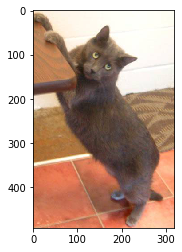

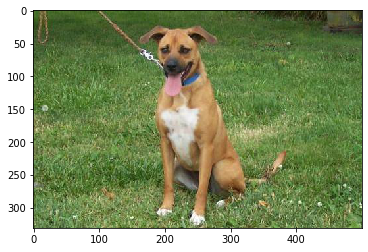

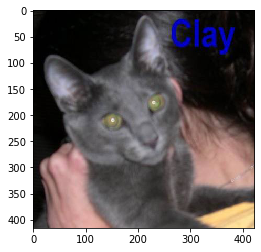

In [82]:
import matplotlib.image as mpimg
for ima in train_imgs[0:3]:
        img=mpimg.imread(ima)
        imgplot = plt.imshow(img)
        plt.show()

Since the photos are not the same size, we will resize them: height:150, width:150 and channel:3 (for the 3 colors RGB).
Then the following function will resize them with the cv2 command and create a new variable X which will hold the new training set and y which will hold our training labels. (1 if the image is a dog and 0 if it is a cat)

In [83]:
nrows = 150
ncolumns = 150
channels = 3  


def read_and_process_image(list_of_images):

    X = [] # images
    y = [] # labels
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows,ncolumns), interpolation=cv2.INTER_CUBIC))  #Read the image
        #get the labels
        if 'dog' in image:
            y.append(1)
        elif 'cat' in image:
            y.append(0)
    
    return X, y

In [84]:
X, y = read_and_process_image(train_imgs)

Then, let’s plot the first 5 arrays of X. We can’t plot the images in X with the mpimg module of matplotlib.image above because these are now arrays of pixels not raw jpg files. So we should use the imshow() command.


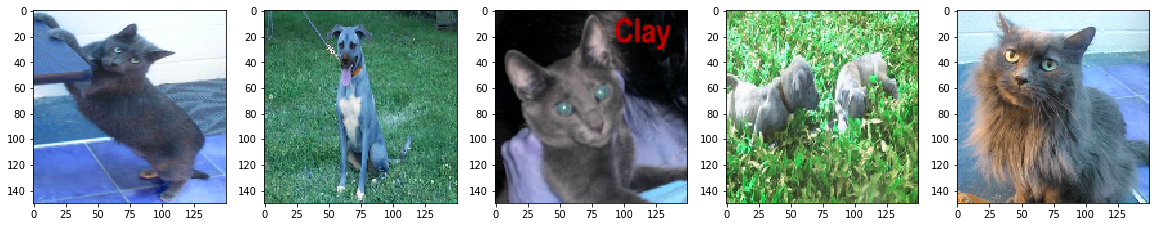

In [85]:
plt.figure(figsize=(20,10))
columns = 5
for i in range(columns):
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(X[i])

## Well-distributed data:

Now we are going to write a code to make sure our data is evenly distributed in each class.

Text(0.5, 1.0, 'Labels for Cats and Dogs')

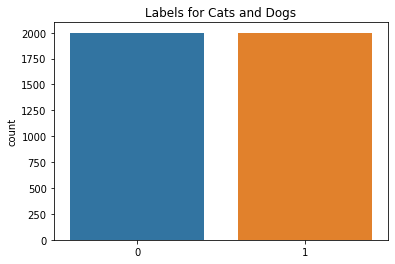

In [86]:
import seaborn as sns
del train_imgs
gc.collect()

#Convert list to numpy array
X = np.array(X)
y = np.array(y)

#Lets plot the label to be sure we just have two class
sns.countplot(y)
plt.title('Labels for Cats and Dogs')

Our data is equitably shared. 

## Shape of the data:

We will check the shape of our data, it is really important for the construction of our CNN model with Keras.

In [87]:
print("Shape of train images is:", X.shape)
print("Shape of labels is:", y.shape)

Shape of train images is: (4000, 150, 150, 3)
Shape of labels is: (4000,)


In [88]:
# train and test set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=2)

print("Shape of train images is:", X_train.shape)
print("Shape of validation images is:", X_val.shape)
print("Shape of labels is:", y_train.shape)
print("Shape of labels is:", y_val.shape)

Shape of train images is: (3200, 150, 150, 3)
Shape of validation images is: (800, 150, 150, 3)
Shape of labels is: (3200,)
Shape of labels is: (800,)


In [95]:
del X
del y
gc.collect()

#length of the train and validation data
ntrain = len(X_train)
nval = len(X_val)

#We will use a batch size of 32. Note: batch size should be a factor of 2.***4,8,16,32,64...***
batch_size = 32

NameError: name 'X' is not defined

## Creating our Convolutional Neural Network code:

In [96]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  #Dropout for regularization
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  #Sigmoid function at the end because we have just two classes


In [97]:
#Show the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [98]:
#RMSprop optimizer with a learning rate of 0.0001
#binary_crossentropy loss because its a binary classification
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Image augmentation:

In [100]:

#Lets create the augmentation configuration
#prevent overfitting, since we are using a small dataset
train_datagen = ImageDataGenerator(rescale=1./255,   #Scale the image between 0 and 1
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)  #We do not augment validation data. we only perform rescale

Image Augmentations techniques are methods of artificially increasing the variations of images in our data-set by using horizontal/vertical flips, rotations, variations in brightness of images, horizontal/vertical shifts etc.

In [101]:
#Create the image generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [102]:
#The training part
#We train for 64 epochs with about 100 steps per epoch
history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=64,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size)



Epoch 1/64
100/100 [==============================] - 152s 2s/step - loss: 0.6902 - acc: 0.5303 - val_loss: 0.6420 - val_acc: 0.5225
Epoch 2/64
100/100 [==============================] - 150s 2s/step - loss: 0.6730 - acc: 0.5828 - val_loss: 0.7872 - val_acc: 0.5088
Epoch 3/64
100/100 [==============================] - 148s 1s/step - loss: 0.6632 - acc: 0.5972 - val_loss: 0.6305 - val_acc: 0.6087
Epoch 4/64
100/100 [==============================] - 149s 1s/step - loss: 0.6496 - acc: 0.6284 - val_loss: 0.6663 - val_acc: 0.5925
Epoch 5/64
100/100 [==============================] - 165s 2s/step - loss: 0.6412 - acc: 0.6334 - val_loss: 0.6362 - val_acc: 0.6175
Epoch 6/64
100/100 [==============================] - 167s 2s/step - loss: 0.6248 - acc: 0.6547 - val_loss: 0.7701 - val_acc: 0.5775
Epoch 7/64
100/100 [==============================] - 174s 2s/step - loss: 0.6165 - acc: 0.6569 - val_loss: 0.6425 - val_acc: 0.6263
Epoch 8/64
100/100 [==============================] - 165s 2s/step -

100/100 [==============================] - 166s 2s/step - loss: 0.4379 - acc: 0.7953 - val_loss: 0.5388 - val_acc: 0.8200
Epoch 61/64
100/100 [==============================] - 158s 2s/step - loss: 0.4313 - acc: 0.7962 - val_loss: 0.5091 - val_acc: 0.7962
Epoch 62/64
100/100 [==============================] - 158s 2s/step - loss: 0.4259 - acc: 0.8037 - val_loss: 0.5680 - val_acc: 0.8037
Epoch 63/64
100/100 [==============================] - 162s 2s/step - loss: 0.4195 - acc: 0.8094 - val_loss: 0.3080 - val_acc: 0.8062
Epoch 64/64
100/100 [==============================] - 164s 2s/step - loss: 0.4130 - acc: 0.8081 - val_loss: 0.6112 - val_acc: 0.8000


This is our model now training the data and then validating it. An epoch is how many times the model trains on our whole data set. Batch can be explained as taking in small amounts, train and take some more. Each epoch must finish all batch before moving to the next epoch. Training with too little epoch can lead to underfitting the data and too many will lead to overfitting the data. You also want a loss that is as low as possible. Here our final accuracy value is 80%.
The pictures below will show the accuracy and loss of our data set

In [103]:
#Save the model
model.save_weights('model_wieghts.h5')
model.save('model_keras.h5')


## Code for visualization of the Accuracy and Loss:

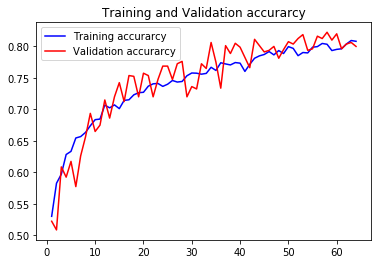

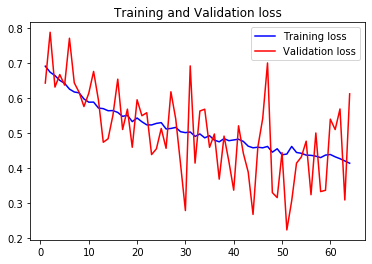

In [104]:
#lets plot the train and val curve
#get the details form the history object
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

Even though according to this graph, it showed that epoch 64 was the best as that was the point of intersection between accuracy and loss.

## Testing:
The final phase is testing on images. The cell blocks below will accomplish that.

In [105]:
#Prediction on the first 10 Images of the test set
X_test, y_test = read_and_process_image(test_imgs[0:10]) #Y_test in this case will be empty.
x = np.array(X_test)
test_datagen = ImageDataGenerator(rescale=1./255)

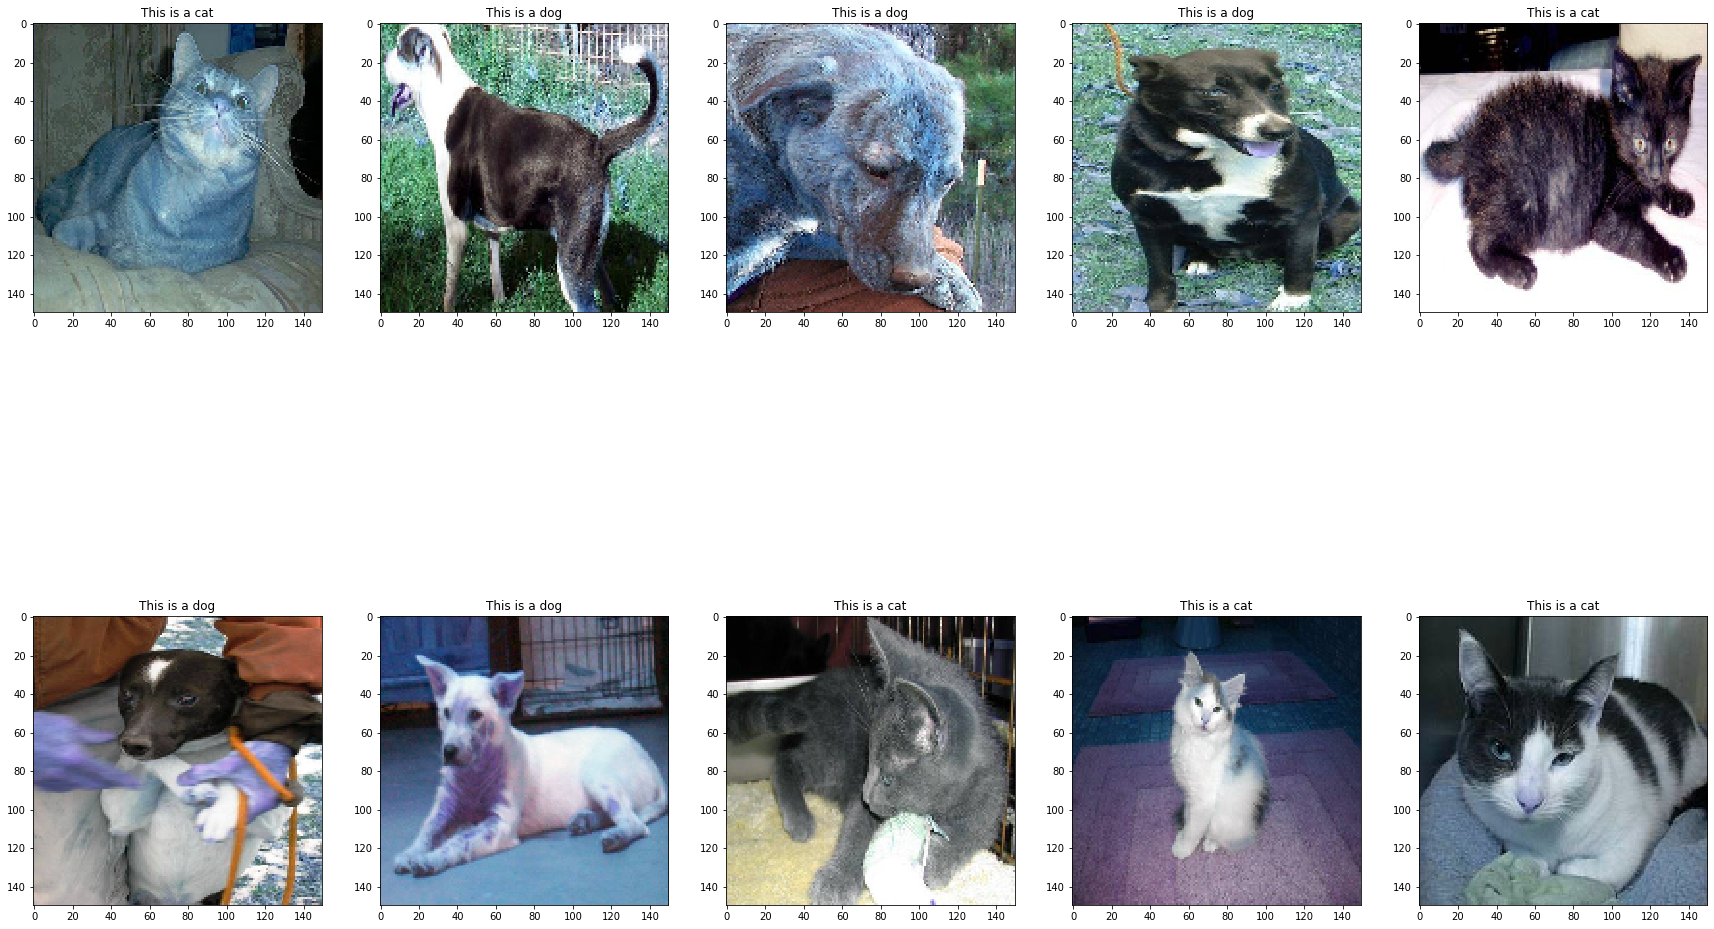

In [106]:
i = 0
text_labels = []
plt.figure(figsize=(30,20))
for batch in test_datagen.flow(x, batch_size=1):
    pred = model.predict(batch)
    if pred > 0.5:
        text_labels.append('dog')
    else:
        text_labels.append('cat')
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.title('This is a ' + text_labels[i])
    imgplot = plt.imshow(batch[0])
    i += 1
    if i % 10 == 0:
        break
plt.show()

On these 10 images our model made no mistakes. Which does not mean it's perfect ...